In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# генерации случайных чисел для инициализации весов
np.random.seed(1)


In [2]:
# вычисление сигмоид функции

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
# вычисление Relu функции

def ReLU(x):
    return x * (x > 0)

In [4]:
def ReLU_deriv(x):
    return 1 if x >= 0 else 0

In [5]:
import numpy as np
import matplotlib.pyplot as plt


# вычисление сигмоид функции
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

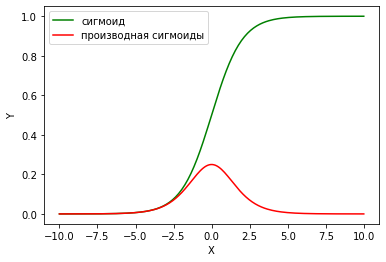

In [6]:
# для картинки
D  = 10

X = np.linspace(0-D, 0+D, 200)
Y = sigmoid(X)
Y_deriv = sigmoid_deriv(X)

plt.plot(X, Y, '-g', label='сигмоид')
plt.plot(X, Y_deriv, '-r', label='производная сигмоиды')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [7]:
# создание данных для обучения
X = np.array([[1]])
y = np.array([[1]]).T

# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X.shape[1], 1))
bias = np.random.random((1, 1))

display(weights, bias)

array([[0.417022]])

array([[0.72032449]])

forward

In [8]:
# сделаем предсказание
output = X * weights + bias
pred = sigmoid(output)
pred

array([[0.75719212]])

In [9]:
# ошибка
(y - pred) ** 2

array([[0.05895567]])

In [10]:
# сделаем backprop
# dloss/dloss = 1
dsigm = 2 * (pred - y)
dsigm
db = dsigm * sigmoid_deriv(output)
db
da = 1 * db
da
dw0 = 1 * db
dw0
dw1 = da * X
dw1

array([[-0.08928153]])

In [11]:
# обновим параметры
bias -= dw0
weights -= dw1

In [12]:
sigmoid(np.dot(X, weights) + bias)

array([[0.78850036]])

#### Обучение на большем количестве объектов

In [13]:
# создание данных для обучения
X = np.array([[0], [1]])
y = np.array([[0, 1]]).T

# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X.shape[1], 1))
bias = np.random.random((1, 1))

display(weights, bias)

array([[0.417022]])

array([[0.72032449]])

Forward

In [14]:
# сделаем предсказание
output = X * weights + bias
pred = sigmoid(output)
pred

array([[0.67267847],
       [0.75719212]])

In [15]:
# ошибка
np.mean((y - pred) ** 2)

0.2557259944893541

Backward

In [16]:
# сделаем backprop
# dloss/dloss = 1
dsigm = (pred - y)
print(dsigm)
db = dsigm * sigmoid_deriv(output)
print(db)
da = 1 * db
print(da)
dw0 = np.ones((X.shape[0])) @ db
print(dw0)
dw1 = np.ones((X.shape[0])) @ (da * X)
# dw1 = da.T @ X
print(dw1)

[[ 0.67267847]
 [-0.24280788]]
[[ 0.14811179]
 [-0.04464077]]
[[ 0.14811179]
 [-0.04464077]]
[0.10347102]
[-0.04464077]


In [17]:
# обновим параметры
bias -= dw0
weights -= dw1

In [18]:
# сделаем предсказания
sigmoid(np.dot(X, weights) + bias)

array([[0.64950258],
       [0.74621309]])

In [19]:
# тренировка нейронной сети
def train_nn(X, y, num_iters):
    global weights, bias
    for n_iter in range(num_iters):
        # проход данных через нейрон
        output = run_nn(X)

        # вычисление ошибки через обратное распространение back-propagation
        error = output - y
            
        # выполнение корректировки весов
        grad = np.dot(X.T, error * sigmoid_deriv(output))
        grad_bias = np.sum(error * sigmoid_deriv(output), keepdims=1)
        weights -= grad
        bias -= grad_bias


# пропускание входных данных через нейрон и получение предсказания
# конвертация значений во floats
def run_nn(inputs):
    global weights, bias
    inputs = inputs.astype(float)
    output = sigmoid(np.dot(inputs, weights) + bias)
    return output

In [20]:
# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X.shape[1], 1))
bias = np.random.random((1, 1))
print("веса до обучения: ")
print(weights, bias)

# запуск тренировки нейронной сети 
train_nn(X, y, 100000)
print("веса после завершения обучения: ")
print(weights, bias)

веса до обучения: 
[[0.417022]] [[0.72032449]]
веса после завершения обучения: 
[[18.21983522]] [[-9.02726036]]


In [21]:
user_inp1, user_inp2 = 0, 1
print(f"Проверка на новых данных: {user_inp1} {user_inp2}")
print("Предсказание нейронной сети: ")
print(run_nn(np.array([[user_inp1], [user_inp2]])))

Проверка на новых данных: 0 1
Предсказание нейронной сети: 
[[1.20076629e-04]
 [9.99898218e-01]]


### Нейрон для регрессии <a class='anchor' id='reg'>

In [22]:
# вычисление ReLU функции

def ReLU(x):
    return x * (x > 0)

In [23]:
def ReLU_deriv(x):
    return np.where(x >= 0, 1, 0)

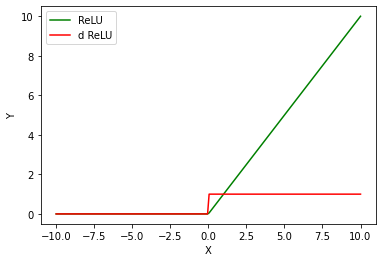

In [24]:
# для картинки
D = 10

X = np.linspace(0-D, 0+D, 200)
Y = ReLU(X)
dY = ReLU_deriv(X)

plt.plot(X, Y, '-g', label='ReLU')
plt.plot(X, dY, '-r', label='d ReLU')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [25]:
# тренировка нейронной сети
def train_nn(X, y, num_iters):
    global weights, bias
    for n_iter in range(num_iters):
        # проход данных через нейрон
        output = run_nn(X)

        # вычисление ошибки через обратное распространение back-propagation
        error = output - y
            
        # выполнение корректировки весов
        grad = np.dot(X.T, error * ReLU_deriv(output))
        grad_bias = np.sum(error * ReLU_deriv(output), keepdims=1)
        weights -= 0.01 * grad
        bias -= 0.01 * grad_bias


# пропускание входных данных через нейрон и получение предсказания
# конвертация значений во floats
def run_nn(inputs):
    global weights, bias
    inputs = inputs.astype(float)
    output = ReLU(np.dot(inputs, weights) + bias)
    return output

In [26]:
# создание данных для обучения
X = np.array([[1], [3], [2], [4], [7]])
y = np.array([[3, 9, 6, 12, 21]]).T

# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X.shape[1], 1))
bias = np.random.random((1, 1))
print("веса до обучения: ")
print(weights, bias)

# запуск тренировки нейронной сети 
train_nn(X, y, 10000)
print("веса после завершения обучения: ")
print(weights, bias)

веса до обучения: 
[[0.417022]] [[0.72032449]]
веса после завершения обучения: 
[[3.]] [[3.10711067e-15]]


In [27]:
user_inp1, user_inp2 = 5, 9
print(f"Проверка на новых данных: {user_inp1} {user_inp2}")
print("Предсказание нейронной сети: ")
print(run_nn(np.array([[user_inp1], [user_inp2]])))

Проверка на новых данных: 5 9
Предсказание нейронной сети: 
[[15.]
 [27.]]


### Нейрон для многоклассовой классификации <a class='acnhor' id='multiclass'>

In [28]:
import numpy as np
import matplotlib.pyplot as plt


# вычисление сигмоид функции
def sigmoid(x):
    x = np.clip(x, a_min=-500, a_max=500)
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

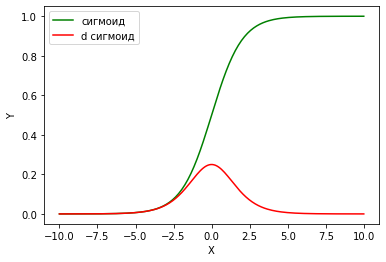

In [29]:
# для картинки
D = 10

X = np.linspace(0-D, 0+D, 200)
Y = sigmoid(X)
dY = sigmoid_deriv(X)

plt.plot(X, Y, '-g', label='сигмоид')
plt.plot(X, dY, '-r', label='d сигмоид')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

(1797, 64)


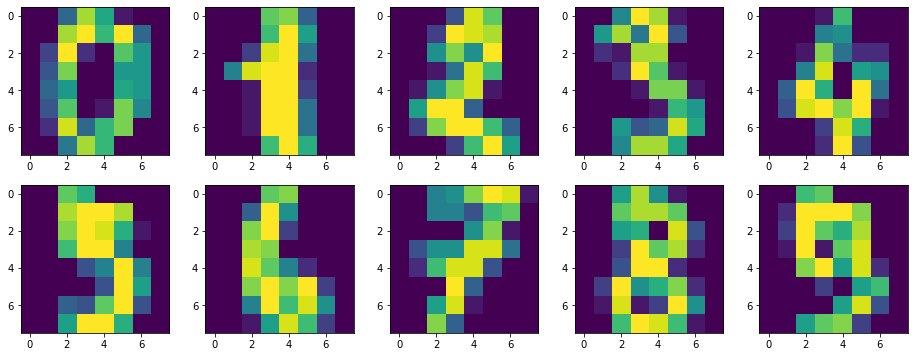

In [30]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# Подготовка тренировочных данных
X, y = load_digits(return_X_y=True)
print(X.shape) # расскоментируйте, чтобы размер данных

# репрезентация данных
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8, 8]))

In [31]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [32]:
def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

In [33]:
# формирование входных данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# формирование выходных данных(результатов)
y = y.flatten()
y = to_one_hot(y)
display(y, y.shape)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

(1797, 10)

In [34]:
from sklearn.model_selection import train_test_split

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape

((1203, 64), (594, 64))

In [35]:
# тренировка нейронной сети
def train_nn(X, y, num_iters):
    global weights
    for n_iter in range(num_iters):
        # проход данных через нейрон
        output = run_nn(X)

        # вычисление ошибки через обратное распространение back-propagation
        error = output - y
        
        # выполнение корректировки весов
        grad = np.dot(X.T, error * sigmoid_deriv(output))

        weights -= 0.01 * grad
        
        
        error = np.mean(np.abs(error))
        errors.append(error)
        
        # получение метрики качества
        preds = np.argmax(output, axis=1)
        labels = np.argmax(y, axis=1)
        accuracy = (preds == labels).sum() * 100 / len(labels)
        metrics.append(accuracy)

# пропускание входных данных через нейрон и получение предсказания
# конвертация значений во floats
def run_nn(inputs):
    global weights
    inputs = inputs.astype(float)
    output = sigmoid(np.dot(inputs, weights))
    return output

In [36]:
# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X_train.shape[1], 10))
errors = []
metrics = []

In [37]:
weights.size

640

In [38]:
# запуск тренировки нейронной сети 
epochs = 20
train_nn(X_train, y_train, epochs)

Предсказание нейронной сети: 
2


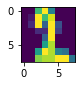

In [39]:
ind = np.random.randint(0, X_test.shape[0])
test_img = X_test[ind]
plt.figure(figsize=(1, 1))
plt.imshow(test_img.reshape([8,8]))

print("Предсказание нейронной сети: ")
print(np.argmax(run_nn(X_test[ind])))

In [40]:
run_nn(X_test[ind])

array([0.00141616, 0.13769793, 0.93216512, 0.02312001, 0.00229921,
       0.02337297, 0.00431845, 0.00625284, 0.06007353, 0.01673659])

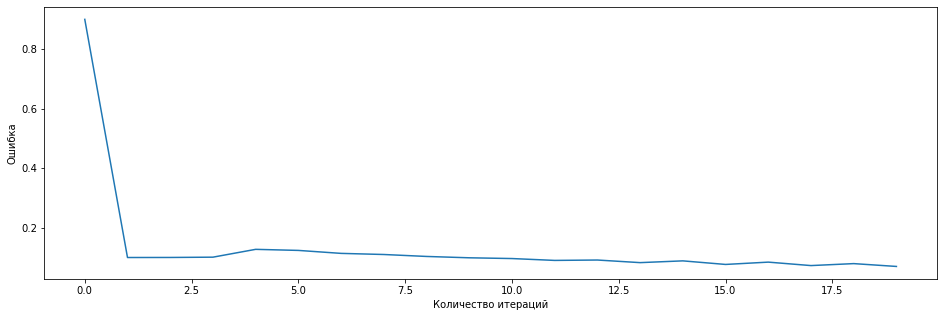

In [41]:
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Количество итераций')
plt.ylabel('Ошибка')
plt.show()

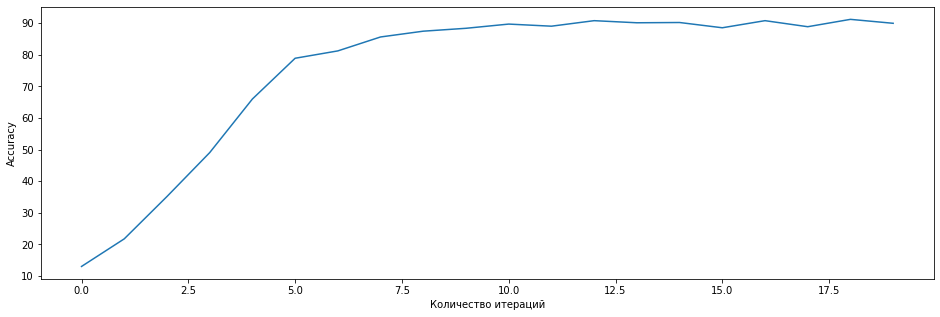

In [42]:
plt.figure(figsize=(16, 5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

In [43]:
test_preds = np.argmax(run_nn(X_test), axis=1)
test_labels = np.argmax(y_test, axis=1)

test_accuracy = (test_preds == test_labels).sum() * 100 / len(test_labels)
print(f'Accuracy на тесте {test_accuracy:.2f}%')

Accuracy на тесте 88.05%


## Пример построения  двухслойной нейронной сети на numpy <a class='anchor' id='example2'>

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [45]:
# Обучение нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 5

# присваивание случайных весов
#np.random.seed(1)
#w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
#w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

# скорость обучения (learning rate)
learning_rate = 0.1

# количество итераций
num_epochs = 100

# массив для ошибок, чтобы потом построить график
errors = []
metrics = []
#--------------------------------------
accuracy_train_list = []
accuracy_test_list = []
list_val = [[3, 0.1, 100], [4, 0.1, 100], [5, 0.1, 100], [6, 0.1, 100], [7, 0.1, 100], [8, 0.1, 100],
           [5, 0.01, 100], [5, 0.05, 100], [5, 0.1, 100], [5, 0.15, 100],
           [5, 0.1, 50], [5, 0.1, 100], [5, 0.1, 150], [5, 0.1, 200],
           [5, 0.05, 130]]
#--------------------------------------
# процесс обучения
#neuron_numb = 5, learning_rate = 0.1, num_epochs = 100
for val in list_val:
    def train(X_test, neuron_numb=val[0], learning_rate=val[1], num_epochs=val[2]):
        np.random.seed(1)
        w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
        w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

        for i in range(num_epochs):

            # прямое распространение(feed forward)
            layer0 = X_train
            layer1 = sigmoid(np.dot(layer0, w0))
            layer2 = sigmoid(np.dot(layer1, w1))

            # обратное распространение (back propagation)
            # с использованием градиентного спуска
            layer2_error = layer2 - y_train  # производная функции потерь
            layer2_grad = layer2_error * sigmoid_deriv(layer2)

            layer1_error = layer2_grad.dot(w1.T)
            layer1_grad = layer1_error * sigmoid_deriv(layer1)

            w1 -= layer1.T.dot(layer2_grad) * learning_rate
            w0 -= layer0.T.dot(layer1_grad) * learning_rate

            # ошибка модели
            error = np.mean(np.abs(layer2_error))
            errors.append(error)

            # метрики качества
            preds = np.argmax(layer2, axis=1)
            labels = np.argmax(y_train, axis=1)
            accuracy = (preds == labels).sum() * 100 / len(labels)
            metrics.append(accuracy)

        accuracy_train = {accuracy: [neuron_numb, learning_rate, num_epochs]}

        #передсказание на тесте
        layer0_test = X_test
        layer1_test = sigmoid(np.dot(layer0_test, w0))
        layer2_test = sigmoid(np.dot(layer1_test, w1))
        # метрика модели
        preds_test = np.argmax(layer2_test, axis=1)
        labels_test = np.argmax(y_test, axis=1)
        accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

        accuracy_test_ret = {accuracy_test: [neuron_numb, learning_rate, num_epochs]}

        return preds, labels, accuracy, accuracy_train, accuracy_test_ret, errors, metrics, layer0, layer1, layer2, w0, w1


    preds, labels, accuracy, accuracy_train, accuracy_test_ret, errors, metrics, layer0, layer1, layer2, w0, w1 = train(X_test)

    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test_ret)

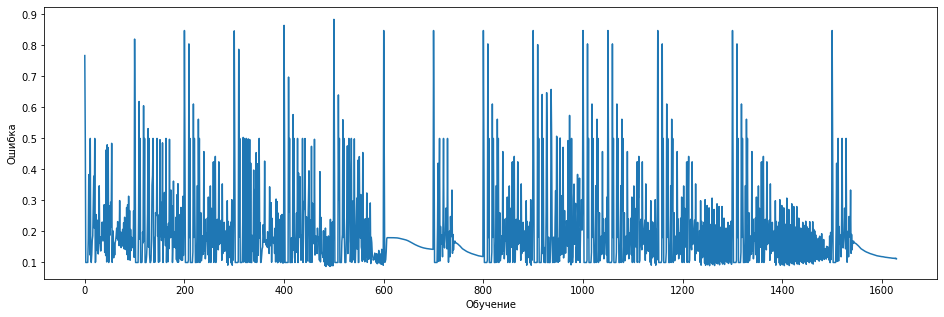

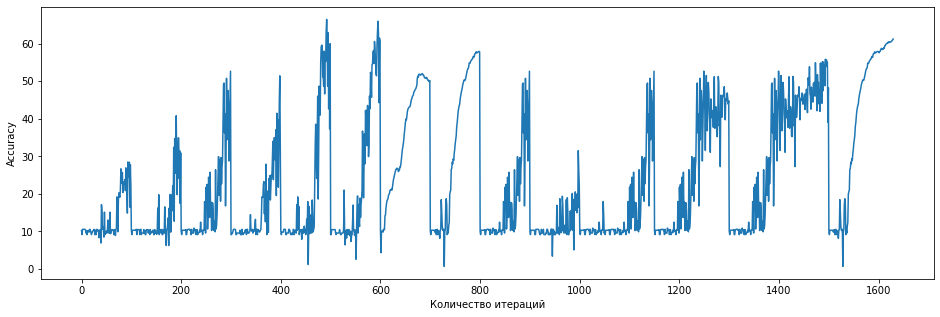

In [46]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

In [47]:
y_train[:10]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

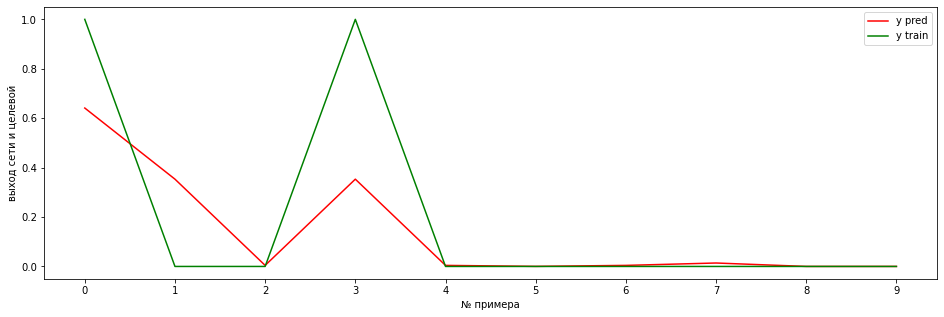

accuracy на обучении 61.26%


In [48]:
N = 10
label = 2
plt.figure(figsize=(16, 5))
plt.plot(layer2[:N, label], 'r', label='y pred')
plt.plot(y_train[:N, label],'g', label='y train')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()
        
print(f"accuracy на обучении {accuracy:.2f}%")

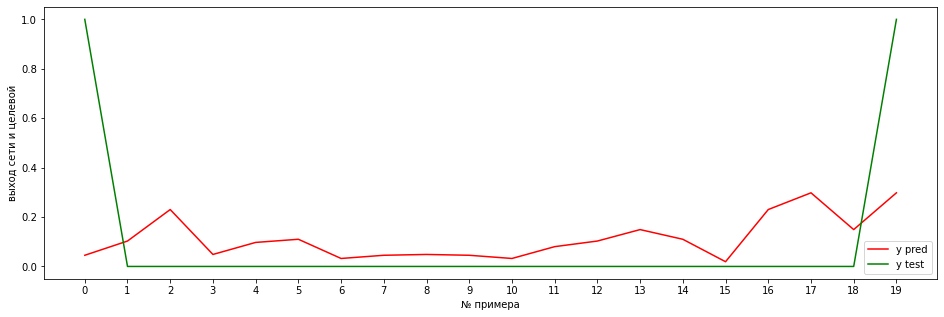

accuracy на тесте 56.90%


In [49]:
# прямое распространение(feed forward)
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))
    
    
N = 20
plt.figure(figsize=(16, 5))
plt.plot(layer2_test[:N, 1], 'r', label='y pred')
plt.plot(y_test[:N, 1], 'g', label='y test')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

# метрика модели
preds_test = np.argmax(layer2_test, axis=1)
labels_test = np.argmax(y_test, axis=1)
accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

print(f"accuracy на тесте {accuracy_test:.2f}%")

В этом уроке мы с вами рассматривали, как сделать простые нейронные сети без использования специальных фреймворков и библиотек для этого. В следующих уроках мы с вами познакомимся, как делать нейронные сети с помощью Keras и TensorFlow.

## Домашнее задание <a class='anchor' id='hw'>

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность.
2. Проведите анализ — что приводит к ухудшению точности нейронной сети?
3. Что приводит к увеличению ее точности?

### Для выполнения домашнего задания, код двухслойной нейронной сети и, дополнительно, предсказаний на тесте, был обёрнут в функцию. Данная функция вызывалась в цикле, где на каждой итерации цикла в функцию передавался список иследуемых значений. Результаты выполнения функции записывались в список из словарей, где ключём выступало значение accuracy, а значениями - значения иследуемых параметров. Далее производится сравнительный анализ данных значений 

In [50]:
accuracy_train_list

[{22.27763923524522: [3, 0.1, 100]},
 {30.92269326683292: [4, 0.1, 100]},
 {52.70157938487115: [5, 0.1, 100]},
 {28.761429758935993: [6, 0.1, 100]},
 {60.0166251039069: [7, 0.1, 100]},
 {60.68162926018287: [8, 0.1, 100]},
 {50.20781379883624: [5, 0.01, 100]},
 {57.85536159600998: [5, 0.05, 100]},
 {52.70157938487115: [5, 0.1, 100]},
 {22.194513715710723: [5, 0.15, 100]},
 {9.559434746467165: [5, 0.1, 50]},
 {52.70157938487115: [5, 0.1, 100]},
 {44.80465502909393: [5, 0.1, 150]},
 {48.29592684954281: [5, 0.1, 200]},
 {61.26350789692435: [5, 0.05, 130]}]

In [51]:
accuracy_test_list

[{26.5993265993266: [3, 0.1, 100]},
 {31.64983164983165: [4, 0.1, 100]},
 {50.168350168350166: [5, 0.1, 100]},
 {34.84848484848485: [6, 0.1, 100]},
 {46.8013468013468: [7, 0.1, 100]},
 {55.21885521885522: [8, 0.1, 100]},
 {48.484848484848484: [5, 0.01, 100]},
 {54.377104377104374: [5, 0.05, 100]},
 {50.168350168350166: [5, 0.1, 100]},
 {12.794612794612794: [5, 0.15, 100]},
 {20.875420875420875: [5, 0.1, 50]},
 {50.168350168350166: [5, 0.1, 100]},
 {45.28619528619529: [5, 0.1, 150]},
 {37.71043771043771: [5, 0.1, 200]},
 {56.9023569023569: [5, 0.05, 130]}]

# Выводы

### 1) Увеличение числа нейронов скрытого слоя neuron_numb, влияет на accuracy разнонаправлено - в основном с повышением количества нейронов, точность возрастает на train и test, но при значении равным 6, происходит резкое ухудшение метрики качества


### 2) Параметры скорость обучения (learning rate) и количество итераций (num_epochs) взаимосвязаны, т.к. чем меньше скорость обучения, тем точнее обучается модель, но может произойти остановка из-за исчерпания количества итераций. Поэтому необходим баланс - скорость обучения, чем меньше тем лучше, но при этом необходимо помнить про увеличение числа итераций. При фиксированных количествах итераций, локальный максимум достигается при значении скорости обучения приблизительно 0.05


### 3) Увеличение числа итераций на train приводит к повышению метрики качества, но на test с определённого значения (приблизительно 150), происходит ухудшение метрики  качества

### Таким образом, наилучшая комбинация параметров на train и test - neuron_numb = 5,learning rate = 0.05, num_epochs = 130 

### значения accuracy_train = 61.26350789692435, accuracy_test = 56.9023569023569